In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('sales_data.csv')
df.head()


,Order ID,Product,Category,Quantity,Price,Total Sales,Customer Location,Date
0,1,External Hard Drive,Accessories,4,80,320,Denver,2025-03-05
1,2,Monitor,Electronics,4,300,1200,Denver,2025-03-31
2,3,Speakers,Accessories,5,100,500,Boston,2025-03-29
3,4,Laptop,Electronics,1,1000,1000,Los Angeles,2025-03-02
4,5,Speakers,Accessories,4,100,400,Miami,2025-03-20


In [ ]:
# Check for missing values
df.isnull().sum()

# Fill missing values (example: replace NaN in 'Customer Location' with 'Unknown')
df['Customer Location'].fillna('Unknown', inplace=True)

# Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Remove duplicates
df.drop_duplicates(inplace=True)


<ipython-input-4-5acbcfddb6b1>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer Location'].fillna('Unknown', inplace=True)


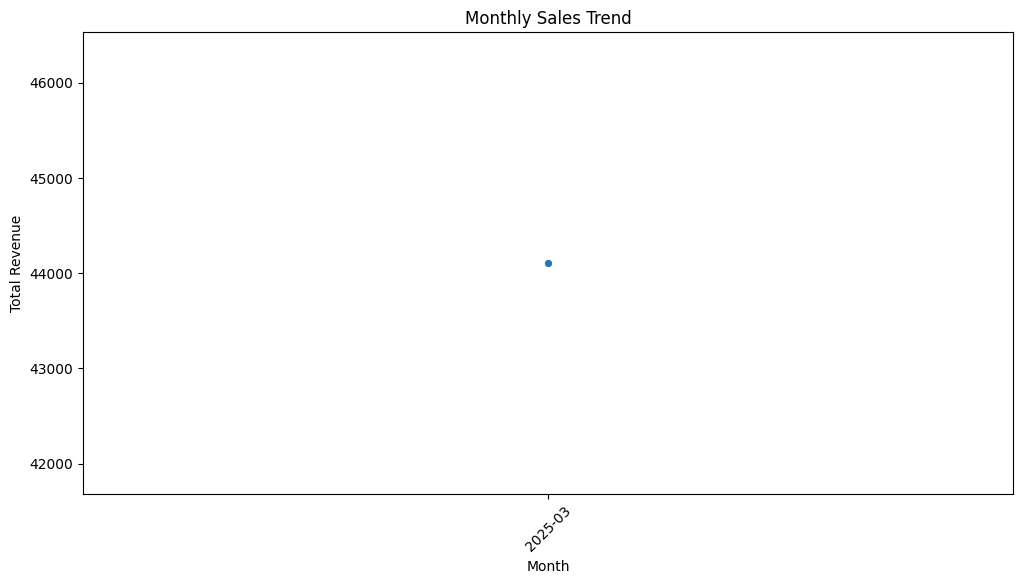

In [ ]:
df['Month'] = df['Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Total Sales'].sum()

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend')
plt.ylabel('Total Revenue')
plt.show()


<ipython-input-6-79a48bb09cf9>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')


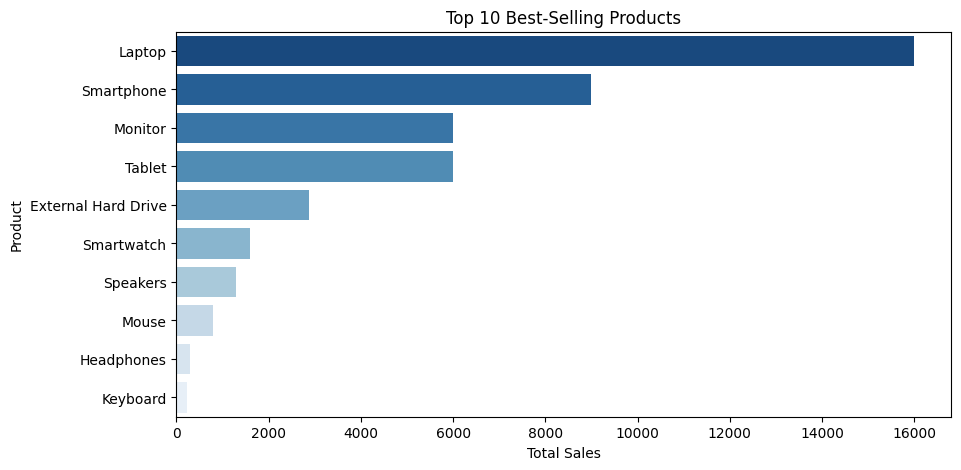

In [ ]:
top_products = df.groupby('Product')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x=top_products.values, y=top_products.index, palette='Blues_r')
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Sales')
plt.show()


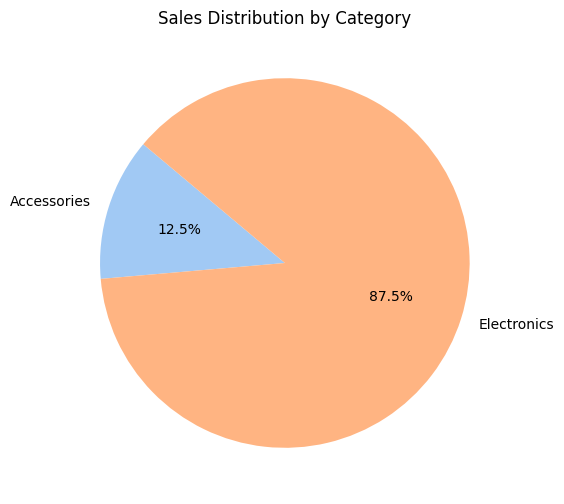

In [ ]:
category_sales = df.groupby('Category')['Total Sales'].sum()

plt.figure(figsize=(8,6))
plt.pie(category_sales, labels=category_sales.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Sales Distribution by Category')
plt.show()


Regional Sales Analysis

<ipython-input-8-0e18f910c8d7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=location_sales.index, y=location_sales.values, palette='coolwarm')


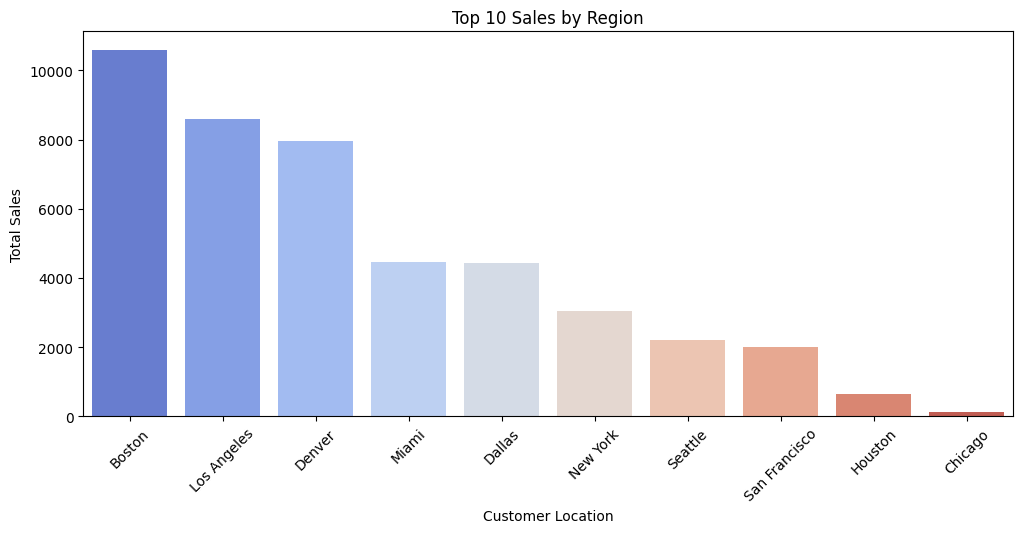

In [ ]:
location_sales = df.groupby('Customer Location')['Total Sales'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,5))
sns.barplot(x=location_sales.index, y=location_sales.values, palette='coolwarm')
plt.xticks(rotation=45)
plt.title('Top 10 Sales by Region')
plt.ylabel('Total Sales')
plt.show()
